numpyとfor文でどれくらい差が出るか比較しようとしたもの。10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def func1(N):
    stime = time.time()
    x = np.linspace(0, 2*np.pi, N)
    y = np.cos(x)
    return time.time() - stime

In [3]:
def func2(N):
    stime = time.time()
    x = [i*(2*np.pi)/float(N-1) for i in xrange(N)]
    y = []
    for _x in x:
        y.append(np.cos(_x))
    return time.time() - stime

In [10]:
def search(x, N, dN):
    while dN > 2:
        while func2(N) < func1(N)*x:
            N += dN
        else:
            dN = dN/2
            N -= dN
            search(x, N, dN)
    result = N
    return result

In [15]:
def test(X):
    a = np.arange(X)
    b = []
    for x in a:
        b.append(search(x, 1000, 1000))
    return b

In [23]:
a = np.arange(30)
b = test(30)

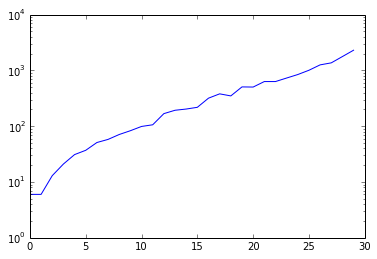

In [25]:
f = plt.figure()
ax = f.add_subplot(111)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.plot(a, np.array(b))
plt.show()